In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
data = pd.read_csv("C:\\Users\\PARMEET KAUR\\Downloads\\archive\\Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [21]:
#Select relevant features for clustering
#Here we will use 'Annual Income(k$)'
features=['Annual Income (k$)', 'Spending Score (1-100)']
X=data[features]
data.shape


(200, 5)

In [22]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
#Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Determine the optional number of clusters using the Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

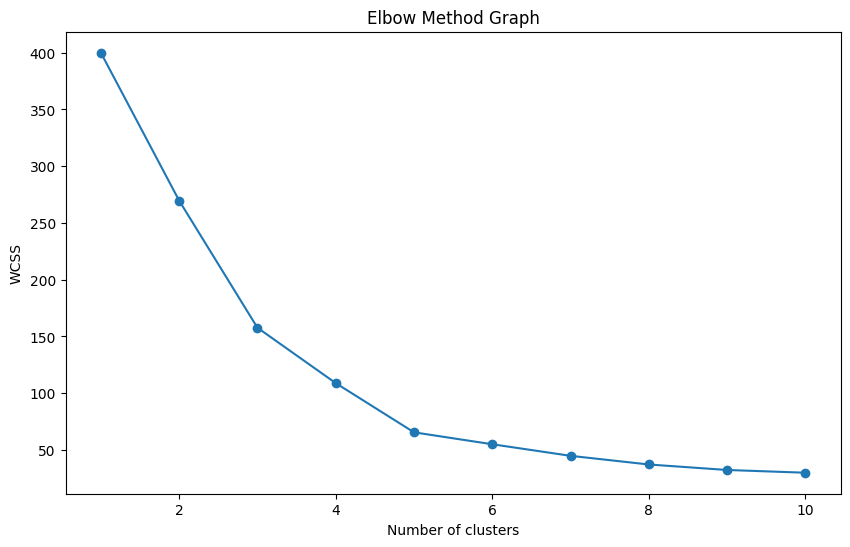

In [23]:
#Plot the Elbow method graph

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#Apply kmeans with the optional number of clusters (let's assume it's 5 based on the Elobw Method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
#Add the cluster information to the original dataset
data['Cluster']=clusters

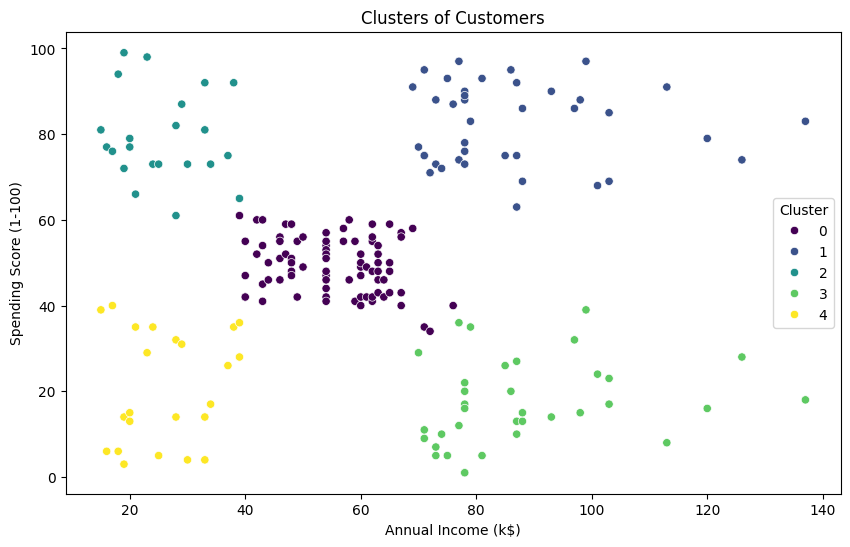

In [10]:
#Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',palette='viridis', data=data)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()